# Demand for Bike Sharing

This project is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. 

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading and Understanding Data

In [3]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Missing values
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping unnecessary columns

In [8]:
day.drop(["instant","dteday","casual","registered"], axis =1, inplace = True)

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
# Changing column names
day.rename(columns={"yr":"year",
                    "mnth":"month",
                    "hum":"humidity",
                    "cnt":"count"}, inplace = True)

In [11]:
day.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [12]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
day.season.replace({1:"season_1_spring",
                    2:"season_2_summer",
                    3:"season_3_fall",
                    4:"season_4_winter"}, inplace = True)

In [14]:
day.month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [15]:
day.month.replace({1:"Jan",
                   2:"Feb",
                   3:"March",
                   4:"April",
                   5:"May",
                   6:"June",
                   7:"July",
                   8:"Aug",
                   9:"Sept",
                   10:"Oct",
                   11:"Nov",
                   12:"Dec"}, inplace =True)

In [16]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
day.weathersit.replace({1:"Clear_Few Clouds",
                        2:"Mist_Cloudy",
                        3:"Light snow_Light Rain_Thunderstorm",
                        4:"Heavy Rain_Ice Pallets_Thunderstorm_Mist"}, inplace = True)

In [18]:
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,season_1_spring,0,Jan,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,season_1_spring,0,Jan,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,season_1_spring,0,Jan,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,season_1_spring,0,Jan,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,season_1_spring,0,Jan,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


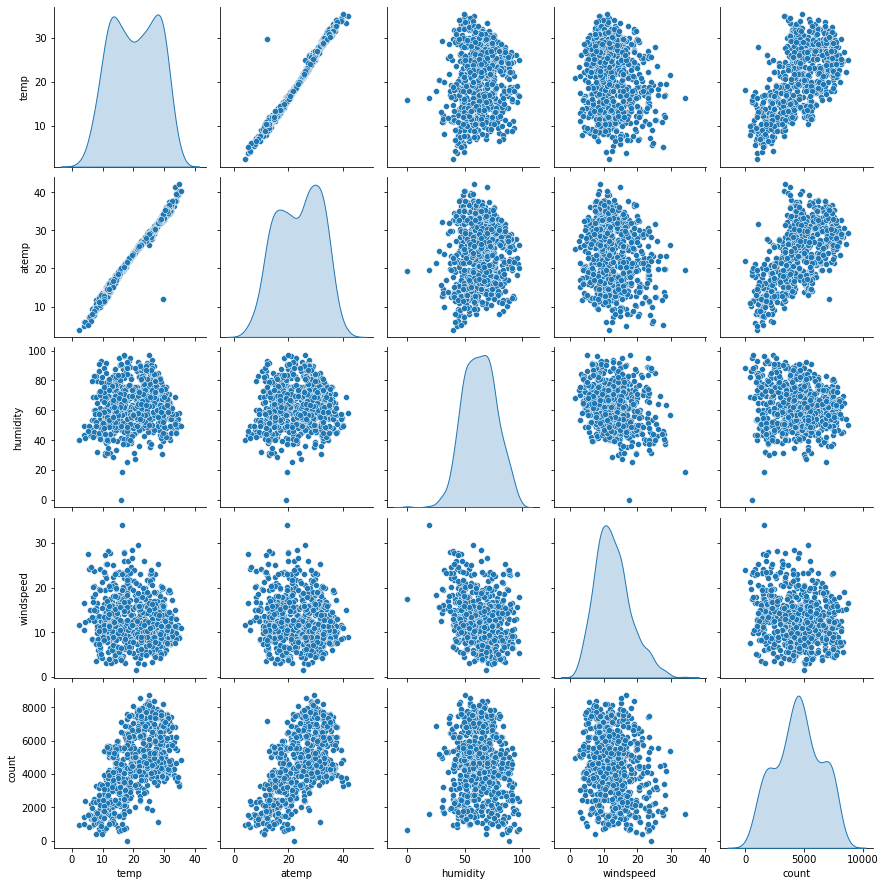

In [19]:
# Pair plot

sns.pairplot(day, vars=["temp","atemp","humidity","windspeed","count"], diag_kind="kde")
plt.show()

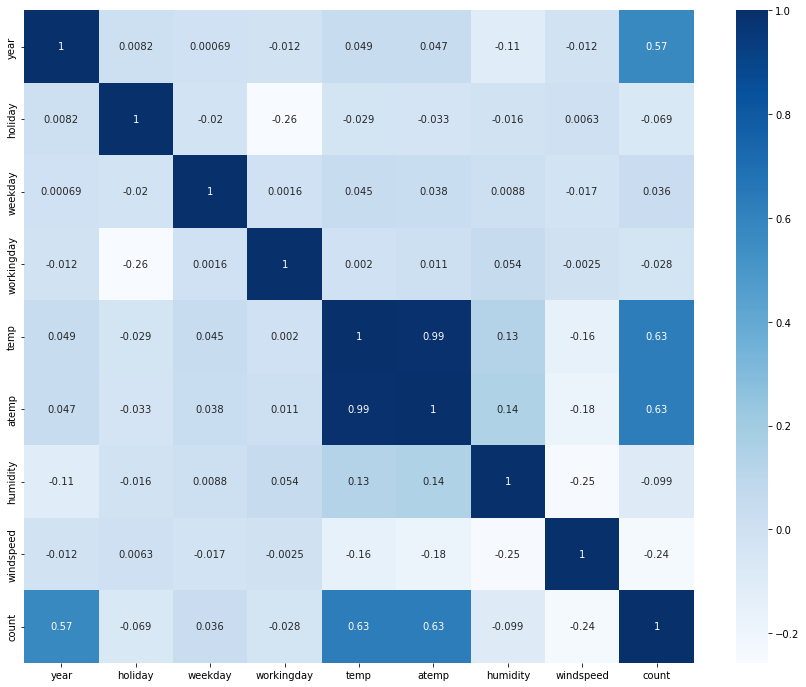

In [20]:
# Heatmap showing correlation

plt.figure(figsize = (15,12))
sns.heatmap(day.corr(), annot = True, cmap = "Blues")
plt.show()

In [21]:
# correlation between temp and atemp is 0.99.
# so drop the temp column
day.drop("temp", axis = 1, inplace = True)

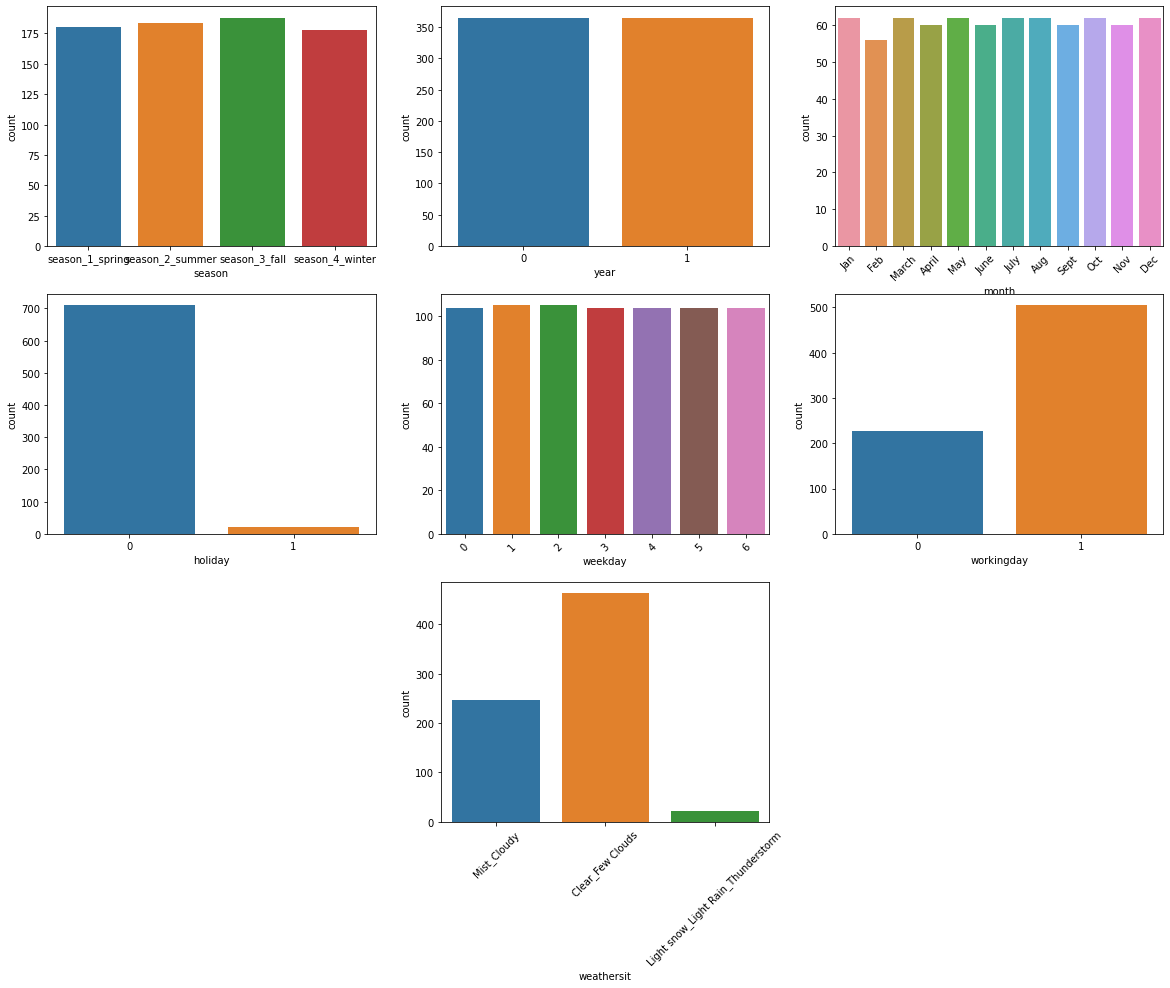

In [22]:
# Count plots for all categorical variables
fig, ax = plt.subplots(nrows = 3,
                       ncols = 3,
                       figsize = (20,15))


sns.countplot(data = day, x = "season", ax= ax[0,0])
sns.countplot(data = day, x = "year", ax= ax[0,1])
sns.countplot(data = day, x = "month", ax= ax[0,2])
sns.countplot(data = day, x = "holiday", ax= ax[1,0])
sns.countplot(data = day, x = "weekday", ax= ax[1,1])
sns.countplot(data = day, x = "workingday", ax= ax[1,2])
sns.countplot(data = day, x = "weathersit", ax= ax[2,1])



ax[0,2].tick_params(axis='x', rotation=45)
ax[1,1].tick_params(axis='x', rotation=45)
ax[2,1].tick_params(axis='x', rotation=45)


fig.delaxes(ax[2,0]) # delete plot in position [2,0]
fig.delaxes(ax[2,2]) # delete plot in position [2,2]

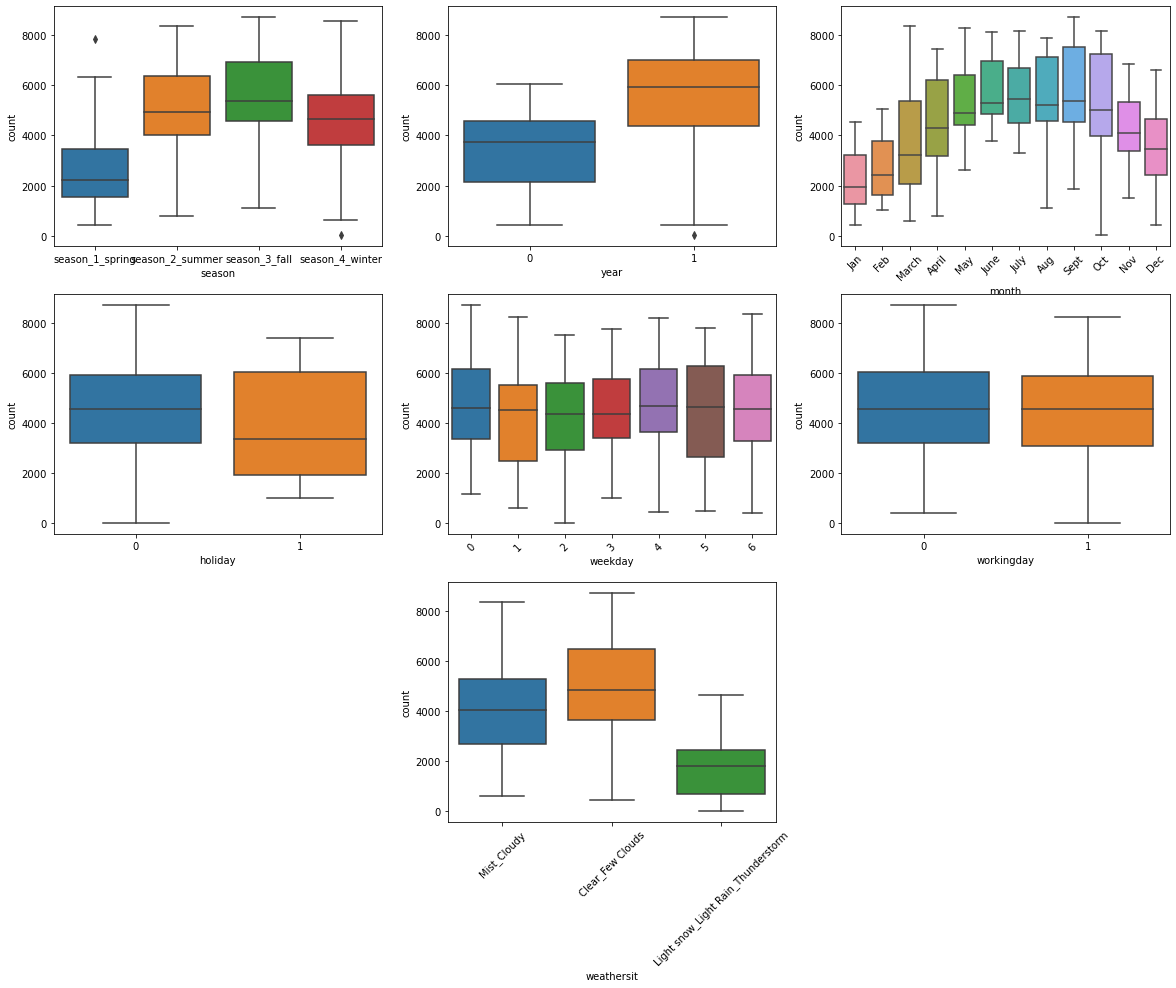

In [23]:
# Box plot for all categorical variables
fig, ax = plt.subplots(nrows = 3,
                       ncols = 3,
                       figsize = (20,15))


sns.boxplot(data = day, x = "season", y = "count", ax= ax[0,0])
sns.boxplot(data = day, x = "year", y = "count", ax= ax[0,1])
sns.boxplot(data = day, x = "month", y = "count", ax= ax[0,2])
sns.boxplot(data = day, x = "holiday", y = "count", ax= ax[1,0])
sns.boxplot(data = day, x = "weekday", y = "count", ax= ax[1,1])
sns.boxplot(data = day, x = "workingday", y = "count", ax= ax[1,2])
sns.boxplot(data = day, x = "weathersit", y = "count", ax= ax[2,1])



ax[0,2].tick_params(axis='x', rotation=45)
ax[1,1].tick_params(axis='x', rotation=45)
ax[2,1].tick_params(axis='x', rotation=45)


fig.delaxes(ax[2,0]) # delete plot in position [2,0]
fig.delaxes(ax[2,2]) # delete plot in position [2,2]

## Creating Dummy Variables

In [24]:
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,season_1_spring,0,Jan,0,1,1,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,season_1_spring,0,Jan,0,2,1,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,season_1_spring,0,Jan,0,3,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,season_1_spring,0,Jan,0,4,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,season_1_spring,0,Jan,0,5,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


In [25]:
seasons = pd.get_dummies(day["season"], drop_first = True)
seasons.head()

,season_2_summer,season_3_fall,season_4_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [26]:
months = pd.get_dummies(day["month"], drop_first=True, prefix = "month")
months.head()

,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_March,month_May,month_Nov,month_Oct,month_Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [27]:
weekdays = pd.get_dummies(day["weekday"], drop_first=True, prefix = "weekday")
weekdays.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [28]:
weathers = pd.get_dummies(day["weathersit"], drop_first=True) 
weathers.head()

,Light snow_Light Rain_Thunderstorm,Mist_Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [29]:
day = pd.concat([day, seasons], axis =1)
day = pd.concat([day, months], axis =1)
day = pd.concat([day, weekdays], axis =1)
day = pd.concat([day, weathers], axis =1)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   year                                730 non-null    int64  
 2   month                               730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    int64  
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   humidity                            730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  count                               730 non-null    int64  
 11  season_2_summer                     730 non-n

In [30]:
day.drop(["season", "month", "weekday","weathersit"], axis =1 , inplace =True)

In [31]:
day.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_2_summer,season_3_fall,season_4_winter,...,month_Oct,month_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Light snow_Light Rain_Thunderstorm,Mist_Cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Train Test Split

In [32]:
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size= 0.7, random_state= 100)

In [33]:
day_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_2_summer,season_3_fall,season_4_winter,...,month_Oct,month_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Light snow_Light Rain_Thunderstorm,Mist_Cloudy
576,1,0,1,33.1448,70.4167,11.083475,7216,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,11.5850,48.3333,23.500518,1796,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,16.0977,72.9583,14.707907,1683,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Rescaling

In [34]:
scaler = MinMaxScaler()

In [35]:
num_var = ["atemp", "humidity", "windspeed", "count"]

day_train[num_var] = scaler.fit_transform(day_train[num_var])

In [36]:
day_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_2_summer,season_3_fall,season_4_winter,...,month_Oct,month_Sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Light snow_Light Rain_Thunderstorm,Mist_Cloudy
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Dividing into X and y

In [37]:
y_train = day_train.pop("count")
X_train = day_train

In [38]:
X_train.shape

(510, 28)

In [39]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_2_summer', 'season_3_fall', 'season_4_winter', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'Light snow_Light Rain_Thunderstorm', 'Mist_Cloudy'],
      dtype='object')

## Building the Model

### RFE

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2_summer', True, 1),
 ('season_3_fall', False, 2),
 ('season_4_winter', True, 1),
 ('month_Aug', True, 1),
 ('month_Dec', True, 1),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_July', False, 11),
 ('month_June', False, 4),
 ('month_March', False, 14),
 ('month_May', False, 3),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sept', True, 1),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 13),
 ('Light snow_Light Rain_Thunderstorm', True, 1),
 ('Mist_Cloudy', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'season_2_summer',
       'season_4_winter', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Nov', 'month_Sept', 'Light snow_Light Rain_Thunderstorm',
       'Mist_Cloudy'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_3_fall', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_Oct', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

## Building model using statsmodel, for statistics

### Model 1

In [44]:
X_train_rfe = X_train[col]

In [45]:
X_train_new1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_new1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          2.92e-186
Time:                        19:37:39   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2931      0.032      9.260      0.000       0.231       0.355
year                                   0.2312      0.008     28.305      0.000       0.215       0.247
holiday                               -0.0837      0.026     -3.226      0.001      -0.135      -0.033
atemp                                  0.4782      0.032     14.978      0.000       0.415       0.541
humidity                              -0.1647      0.038     -4.329      0.000      -0.239      -0.090
windspeed                             -0.1771      0.026     -6.783      0.000      -0.228      -0.126
season_2_summer                        0.0793      0.013      6.295      0.000       0.055       0.104
season_4_winter                        0.1342      0.014      9.373      0.000       0.106       0.162
month_Aug                              0.0606      0.016      3.695      0.000       0.028       0.093
month_Dec                             -0.0486      0.019     -2.622      0.009      -0.085      -0.012
month_Feb                             -0.0497      0.021     -2.348      0.019      -0.091      -0.008
month_Jan                             -0.0762      0.021     -3.577      0.000      -0.118      -0.034
month_Nov                             -0.0417      0.019     -2.186      0.029      -0.079      -0.004
month_Sept                             0.1121      0.017      6.709      0.000       0.079       0.145
Light snow_Light Rain_Thunderstorm    -0.2404      0.027     -9.000      0.000      -0.293      -0.188
Mist_Cloudy                           -0.0554      0.011     -5.240      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       66.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.141
Skew:                          -0.671   Prob(JB):                     3.08e-37
Kurtosis:                       5.472   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.06
2,atemp,14.42
4,windspeed,3.90
6,season_4_winter,3.04
5,season_2_summer,2.29
14,Mist_Cloudy,2.24
0,year,2.06
10,month_Jan,1.92
11,month_Nov,1.87
8,month_Dec,1.64


- VIF of humidity is very high. So drop it

In [47]:
X_train_rfe.drop("humidity", axis = 1, inplace = True)

### Model 2

In [48]:
X_train_new2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train,X_train_new2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          2.01e-183
Time:                        19:37:40   Log-Likelihood:                 498.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     495   BIC:                            -903.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2097      0.026      8.204      0.000       0.160       0.260
year                                   0.2351      0.008     28.454      0.000       0.219       0.251
holiday                               -0.0850      0.026     -3.220      0.001      -0.137      -0.033
atemp                                  0.4446      0.032     14.106      0.000       0.383       0.507
windspeed                             -0.1491      0.026     -5.791      0.000      -0.200      -0.098
season_2_summer                        0.0738      0.013      5.785      0.000       0.049       0.099
season_4_winter                        0.1226      0.014      8.564      0.000       0.094       0.151
month_Aug                              0.0580      0.017      3.474      0.001       0.025       0.091
month_Dec                             -0.0567      0.019     -3.021      0.003      -0.094      -0.020
month_Feb                             -0.0558      0.021     -2.601      0.010      -0.098      -0.014
month_Jan                             -0.0868      0.022     -4.034      0.000      -0.129      -0.045
month_Nov                             -0.0418      0.019     -2.153      0.032      -0.080      -0.004
month_Sept                             0.1048      0.017      6.194      0.000       0.072       0.138
Light snow_Light Rain_Thunderstorm    -0.2863      0.025    -11.474      0.000      -0.335      -0.237
Mist_Cloudy                           -0.0814      0.009     -9.218      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       67.110   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.377
Skew:                          -0.678   Prob(JB):                     7.44e-37
Kurtosis:                       5.448   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,season_4_winter,2.63
0,year,2.06
4,season_2_summer,2.06
10,month_Nov,1.82
6,month_Aug,1.59
13,Mist_Cloudy,1.57
7,month_Dec,1.41
11,month_Sept,1.35


- VIF of atemp = 5.But the temp feature is important for the LR. So drop windspeed

In [50]:
X_train_rfe.drop("windspeed", axis = 1, inplace = True)

### Model 3

In [51]:
X_train_new3 = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train,X_train_new3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.6
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.52e-177
Time:                        19:37:41   Log-Likelihood:                 481.87
No. Observations:                 510   AIC:                            -935.7
Df Residuals:                     496   BIC:                            -876.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1335      0.023      5.901      0.000       0.089       0.178
year                                   0.2335      0.009     27.392      0.000       0.217       0.250
holiday                               -0.0876      0.027     -3.216      0.001      -0.141      -0.034
atemp                                  0.4880      0.032     15.440      0.000       0.426       0.550
season_2_summer                        0.0734      0.013      5.572      0.000       0.048       0.099
season_4_winter                        0.1332      0.015      9.091      0.000       0.104       0.162
month_Aug                              0.0630      0.017      3.663      0.000       0.029       0.097
month_Dec                             -0.0444      0.019     -2.307      0.021      -0.082      -0.007
month_Feb                             -0.0512      0.022     -2.311      0.021      -0.095      -0.008
month_Jan                             -0.0676      0.022     -3.080      0.002      -0.111      -0.024
month_Nov                             -0.0405      0.020     -2.018      0.044      -0.080      -0.001
month_Sept                             0.1135      0.017      6.528      0.000       0.079       0.148
Light snow_Light Rain_Thunderstorm    -0.2980      0.026    -11.608      0.000      -0.348      -0.248
Mist_Cloudy                           -0.0801      0.009     -8.785      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       73.971   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.006
Skew:                          -0.727   Prob(JB):                     1.23e-42
Kurtosis:                       5.640   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.98
4,season_4_winter,2.62
0,year,2.04
3,season_2_summer,1.92
9,month_Nov,1.78
5,month_Aug,1.59
12,Mist_Cloudy,1.57
6,month_Dec,1.38
10,month_Sept,1.35
8,month_Jan,1.15


- month_Nov have high p value. So drop it

In [53]:
X_train_rfe.drop("month_Nov", axis = 1, inplace = True)

### Model 4

In [54]:
X_train_new4 = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train,X_train_new4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     192.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          8.07e-178
Time:                        19:37:42   Log-Likelihood:                 479.79
No. Observations:                 510   AIC:                            -933.6
Df Residuals:                     497   BIC:                            -878.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1204      0.022      5.539      0.000       0.078       0.163
year                                   0.2334      0.009     27.295      0.000       0.217       0.250
holiday                               -0.0943      0.027     -3.474      0.001      -0.148      -0.041
atemp                                  0.5044      0.031     16.465      0.000       0.444       0.565
season_2_summer                        0.0770      0.013      5.888      0.000       0.051       0.103
season_4_winter                        0.1206      0.013      9.067      0.000       0.094       0.147
month_Aug                              0.0637      0.017      3.692      0.000       0.030       0.098
month_Dec                             -0.0281      0.018     -1.602      0.110      -0.062       0.006
month_Feb                             -0.0425      0.022     -1.949      0.052      -0.085       0.000
month_Jan                             -0.0578      0.021     -2.692      0.007      -0.100      -0.016
month_Sept                             0.1185      0.017      6.859      0.000       0.085       0.152
Light snow_Light Rain_Thunderstorm    -0.2939      0.026    -11.448      0.000      -0.344      -0.243
Mist_Cloudy                           -0.0794      0.009     -8.692      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       67.367   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.729
Skew:                          -0.679   Prob(JB):                     3.79e-37
Kurtosis:                       5.460   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.98
0,year,2.04
3,season_2_summer,1.92
4,season_4_winter,1.73
5,month_Aug,1.59
11,Mist_Cloudy,1.56
9,month_Sept,1.33
6,month_Dec,1.22
8,month_Jan,1.15
7,month_Feb,1.11


- month_Feb have high p value. So drop it

In [56]:
X_train_rfe.drop("month_Feb", axis = 1, inplace = True)

### Model 5

In [57]:
X_train_new5 = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train,X_train_new5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          3.59e-178
Time:                        19:37:43   Log-Likelihood:                 477.85
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     498   BIC:                            -880.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0946      0.017      5.474      0.000       0.061       0.129
year                                   0.2328      0.009     27.169      0.000       0.216       0.250
holiday                               -0.0964      0.027     -3.545      0.000      -0.150      -0.043
atemp                                  0.5332      0.027     19.800      0.000       0.480       0.586
season_2_summer                        0.0871      0.012      7.222      0.000       0.063       0.111
season_4_winter                        0.1319      0.012     10.979      0.000       0.108       0.155
month_Aug                              0.0685      0.017      4.002      0.000       0.035       0.102
month_Dec                             -0.0192      0.017     -1.131      0.258      -0.053       0.014
month_Jan                             -0.0374      0.019     -1.988      0.047      -0.074      -0.000
month_Sept                             0.1233      0.017      7.193      0.000       0.090       0.157
Light snow_Light Rain_Thunderstorm    -0.2925      0.026    -11.366      0.000      -0.343      -0.242
Mist_Cloudy                           -0.0797      0.009     -8.701      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       61.994   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.647
Skew:                          -0.625   Prob(JB):                     2.62e-34
Kurtosis:                       5.390   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.92
0,year,2.00
3,season_2_summer,1.86
4,season_4_winter,1.68
5,month_Aug,1.56
10,Mist_Cloudy,1.53
8,month_Sept,1.31
6,month_Dec,1.22
7,month_Jan,1.14
9,Light snow_Light Rain_Thunderstorm,1.06


- month_Dec have high p value. So drop it

In [59]:
X_train_rfe.drop("month_Dec", axis = 1, inplace = True)

### Model 6

In [60]:
X_train_new6 = sm.add_constant(X_train_rfe)
lr6 = sm.OLS(y_train,X_train_new6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          4.38e-179
Time:                        19:37:44   Log-Likelihood:                 477.19
No. Observations:                 510   AIC:                            -932.4
Df Residuals:                     499   BIC:                            -885.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0886      0.016      5.384      0.000       0.056       0.121
year                                   0.2329      0.009     27.171      0.000       0.216       0.250
holiday                               -0.0952      0.027     -3.504      0.000      -0.149      -0.042
atemp                                  0.5405      0.026     20.679      0.000       0.489       0.592
season_2_summer                        0.0888      0.012      7.425      0.000       0.065       0.112
season_4_winter                        0.1298      0.012     10.933      0.000       0.106       0.153
month_Aug                              0.0689      0.017      4.026      0.000       0.035       0.103
month_Jan                             -0.0330      0.018     -1.794      0.073      -0.069       0.003
month_Sept                             0.1247      0.017      7.289      0.000       0.091       0.158
Light snow_Light Rain_Thunderstorm    -0.2905      0.026    -11.312      0.000      -0.341      -0.240
Mist_Cloudy                           -0.0798      0.009     -8.703      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       60.540   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.133
Skew:                          -0.613   Prob(JB):                     2.51e-33
Kurtosis:                       5.358   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.92
0,year,2.00
3,season_2_summer,1.85
5,month_Aug,1.55
4,season_4_winter,1.52
9,Mist_Cloudy,1.52
7,month_Sept,1.30
6,month_Jan,1.14
8,Light snow_Light Rain_Thunderstorm,1.06
1,holiday,1.03


- month_Jan have high p value. So drop it

In [62]:
X_train_rfe.drop("month_Jan", axis = 1, inplace = True)

### Model 7

In [63]:
X_train_new7 = sm.add_constant(X_train_rfe)
lr7 = sm.OLS(y_train,X_train_new7).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.32e-179
Time:                        19:37:45   Log-Likelihood:                 475.55
No. Observations:                 510   AIC:                            -931.1
Df Residuals:                     500   BIC:                            -888.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0721      0.014      5.272      0.000       0.045       0.099
year                                   0.2323      0.009     27.061      0.000       0.215       0.249
holiday                               -0.0957      0.027     -3.513      0.000      -0.149      -0.042
atemp                                  0.5608      0.024     23.749      0.000       0.514       0.607
season_2_summer                        0.0945      0.012      8.176      0.000       0.072       0.117
season_4_winter                        0.1378      0.011     12.514      0.000       0.116       0.159
month_Aug                              0.0710      0.017      4.144      0.000       0.037       0.105
month_Sept                             0.1266      0.017      7.400      0.000       0.093       0.160
Light snow_Light Rain_Thunderstorm    -0.2884      0.026    -11.217      0.000      -0.339      -0.238
Mist_Cloudy                           -0.0807      0.009     -8.794      0.000      -0.099      -0.063
==============================================================================
Omnibus:                       58.995   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.372
Skew:                          -0.593   Prob(JB):                     6.05e-33
Kurtosis:                       5.361   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.91
0,year,1.94
3,season_2_summer,1.80
5,month_Aug,1.53
4,season_4_winter,1.48
8,Mist_Cloudy,1.45
6,month_Sept,1.29
7,Light snow_Light Rain_Thunderstorm,1.06
1,holiday,1.03


### Model 8

In [65]:
X_train_rfe["weekday_1"] = X_train["weekday_1"]

In [66]:
X_train_new8 = sm.add_constant(X_train_rfe)
lr8 = sm.OLS(y_train,X_train_new8).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          2.84e-179
Time:                        19:37:46   Log-Likelihood:                 477.64
No. Observations:                 510   AIC:                            -933.3
Df Residuals:                     499   BIC:                            -886.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0773      0.014      5.571      0.000       0.050       0.105
year                                   0.2317      0.009     27.070      0.000       0.215       0.249
holiday                               -0.0997      0.027     -3.662      0.000      -0.153      -0.046
atemp                                  0.5590      0.024     23.730      0.000       0.513       0.605
season_2_summer                        0.0944      0.012      8.186      0.000       0.072       0.117
season_4_winter                        0.1381      0.011     12.576      0.000       0.117       0.160
month_Aug                              0.0716      0.017      4.194      0.000       0.038       0.105
month_Sept                             0.1262      0.017      7.400      0.000       0.093       0.160
Light snow_Light Rain_Thunderstorm    -0.2879      0.026    -11.231      0.000      -0.338      -0.238
Mist_Cloudy                           -0.0814      0.009     -8.898      0.000      -0.099      -0.063
weekday_1                             -0.0239      0.012     -2.023      0.044      -0.047      -0.001
==============================================================================
Omnibus:                       56.323   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.484
Skew:                          -0.560   Prob(JB):                     4.22e-32
Kurtosis:                       5.355   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.02
0,year,1.94
3,season_2_summer,1.80
5,month_Aug,1.53
4,season_4_winter,1.49
8,Mist_Cloudy,1.45
6,month_Sept,1.29
9,weekday_1,1.16
7,Light snow_Light Rain_Thunderstorm,1.06
1,holiday,1.03


### Model 9

In [68]:
X_train_rfe["weekday_2"] = X_train["weekday_2"]

In [69]:
X_train_new9 = sm.add_constant(X_train_rfe)
lr9 = sm.OLS(y_train,X_train_new9).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          6.39e-180
Time:                        19:37:47   Log-Likelihood:                 481.99
No. Observations:                 510   AIC:                            -940.0
Df Residuals:                     498   BIC:                            -889.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0827      0.014      5.955      0.000       0.055       0.110
year                                   0.2322      0.008     27.326      0.000       0.216       0.249
holiday                               -0.0984      0.027     -3.639      0.000      -0.151      -0.045
atemp                                  0.5611      0.023     23.988      0.000       0.515       0.607
season_2_summer                        0.0939      0.011      8.204      0.000       0.071       0.116
season_4_winter                        0.1394      0.011     12.777      0.000       0.118       0.161
month_Aug                              0.0684      0.017      4.025      0.000       0.035       0.102
month_Sept                             0.1250      0.017      7.384      0.000       0.092       0.158
Light snow_Light Rain_Thunderstorm    -0.2913      0.025    -11.439      0.000      -0.341      -0.241
Mist_Cloudy                           -0.0819      0.009     -9.014      0.000      -0.100      -0.064
weekday_1                             -0.0301      0.012     -2.532      0.012      -0.054      -0.007
weekday_2                             -0.0350      0.012     -2.928      0.004      -0.059      -0.012
==============================================================================
Omnibus:                       54.468   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.086
Skew:                          -0.562   Prob(JB):                     3.43e-29
Kurtosis:                       5.215   Cond. No.                         9.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.18
0,year,1.94
3,season_2_summer,1.80
5,month_Aug,1.54
4,season_4_winter,1.50
8,Mist_Cloudy,1.45
6,month_Sept,1.29
10,weekday_2,1.21
9,weekday_1,1.18
7,Light snow_Light Rain_Thunderstorm,1.06


### The equation of best fitted line based on model 9

In [71]:
print(lr9.params)

const                                 0.082739
year                                  0.232219
holiday                              -0.098352
atemp                                 0.561140
season_2_summer                       0.093872
season_4_winter                       0.139364
month_Aug                             0.068353
month_Sept                            0.125019
Light snow_Light Rain_Thunderstorm   -0.291326
Mist_Cloudy                          -0.081891
weekday_1                            -0.030132
weekday_2                            -0.035048
dtype: float64


count = 0.082739 + (0.232219 * **year**) - (0.098352 * **holiday**) + (0.561140 * **atemp**) + (0.093872 * **season_2_summer**) + (0.139364 * **season_4_winter**) + (0.068353 * **month_Aug**) + (0.125019 * **month_Sept**) - (0.291326 * **Light snow_Light Rain_Thunderstorm**) -  (0.081891 * **Mist_Cloudy**) - (0.030132 * **weekday_1**) - (0.035048 * **weekday_2**)

## Residual Analysis Of Training Data

In [72]:
y_train_pred = lr9.predict(X_train_new9)

In [73]:
res = y_train - y_train_pred

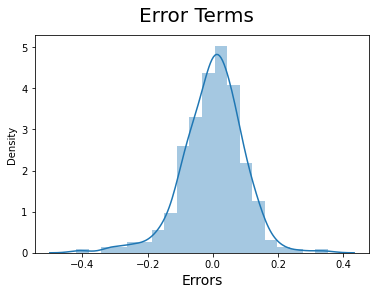

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label
plt.show()

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## PREDICTION USING FINAL MODEL (lm10)


### Applying the scaling on the test sets

In [75]:
num_var = ["atemp", "humidity", "windspeed", "count"]

day_test[num_var] = scaler.transform(day_test[num_var])

### Dividing into X_test and y_test

In [76]:
y_test = day_test.pop("count")
X_test = day_test

### Selecting the variables that were part of final model.

In [77]:
X_train_new9.columns

Index(['const', 'year', 'holiday', 'atemp', 'season_2_summer',
       'season_4_winter', 'month_Aug', 'month_Sept',
       'Light snow_Light Rain_Thunderstorm', 'Mist_Cloudy', 'weekday_1',
       'weekday_2'],
      dtype='object')

In [78]:
X_train_new9.drop("const", axis = 1, inplace = True)

In [79]:
X_test_new = X_test[X_train_new9.columns]

# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

In [80]:
#Making predictions on the chosen model

y_pred = lr9.predict(X_test_new)

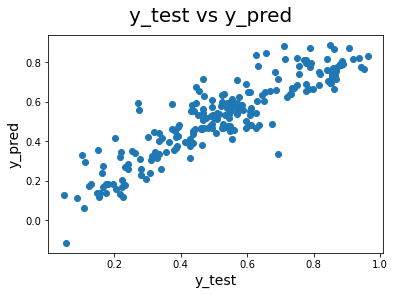

In [81]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=14)                          # Y-label
plt.show()

In [82]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.8020116643287409

In [83]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7729871962722212

<pre>
Train Set:
    r^2 : 0.824
    Adjusted_r^2 : 0.820
    
Test Set :
    r^2 : 0.802
    Adjusted_r^2 : 0.773
    